<a href="https://www.kaggle.com/code/mesutssmn/weekly-weather-temp-forecast-sarimax-lstm?scriptVersionId=193104369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius: 40px; border: #5E5772 solid; padding: 12px; background-color: #145; font-size: 150%; text-align: left; color:#000">

<h3 align="center"><font color='#995' size=120%>Time Series Models for Weather Forecasting</font></h3>

<h4 align="left"><font color='#995' size=5%>To Do :</font></h4>
    
<ul>
<li> Time series analysis and statistics</li>
<li> Implementing forecasting models like Holt-Winters, ARIMA, SARIMA</li>
</ul>
    
<h3 align="left"><font color='#995' size=5%>ABOUT DATA:</font></h3>

This dataset is a meticulously curated collection of weather data for time series analysis. The dataset includes historical temperature data, which is cleaned and ready for developing time series forecasting models such as Holt-Winters, ARIMA, and SARIMA.

<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://images.theconversation.com/files/442675/original/file-20220126-17-1i0g402.jpg?ixlib=rb-4.1.0&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip" alt="Time Series Forecasting" width="900">
</div>
<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://www.analyticssteps.com/backend/media/thumbnail/6006173/6278986_1571298721_Weather_Forecoast_Graphics.jpg" alt="Time Series Forecasting" width="900">
</div>

##### Thank you for taking the time to read. Please don't ignore voting.
</div>


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> IMPORTS </div>


In [1]:
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, LayerNormalization
warnings.filterwarnings('ignore')

2024-08-18 17:39:55.482062: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 17:39:55.482224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 17:39:55.647328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train = pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv')
test = pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv')
df = pd.concat([train, test])

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> DATASET </div>


<div style="font-family: Arial, sans-serif; line-height: 1.6; background-color: #e9f4fb; color: #333; padding: 20px;">
    
<h1 style="color: #2c3e50;">About Dataset</h1>
<p>This dataset is fully dedicated to developers who want to train models on weather forecasting for the Indian climate. The dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The four parameters included are:</p>
<ul>
    <li>Mean Temperature</li>
    <li>Humidity</li>
    <li>Wind Speed</li>
    <li>Mean Pressure</li>
</ul>

<h2 style="color: #2c3e50;">Acknowledgements</h2>
<p>This dataset has been collected from the Weather Underground API. Dataset ownership and credit go to them.</p>

<h2 style="color: #2c3e50;">Inspiration</h2>
<p>This dataset was developed as part of Assignment 4 of the Data Analytics Course, 2019 at PES University, Bangalore.</p>

</div>


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> DATA INFORMATION </div>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 73.9+ KB


In [5]:
df["date"].max(), df["date"].min()

('2017-04-24', '2013-01-01')

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> DATA ANALYSIS </div>


In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df.set_index("date", inplace = True)

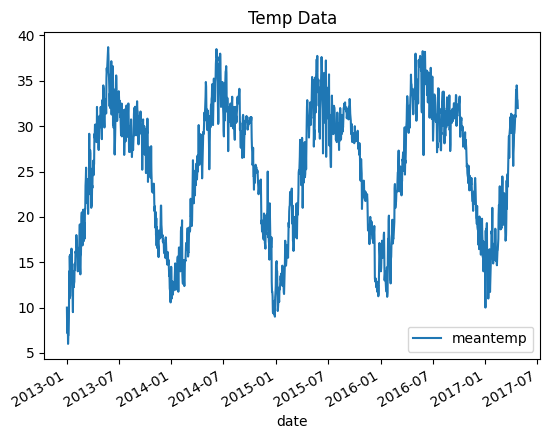

In [8]:
df[['meantemp']].plot(title='Temp Data')
plt.show()

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24'],
              dtype='datetime64[ns]', name='date', length=1576, freq=None)

In [10]:
weekly_mean = df["meantemp"].resample('W').mean()

In [11]:
weekly_mean

date
2013-01-06     7.705556
2013-01-13    12.343537
2013-01-20    13.642857
2013-01-27    12.329592
2013-02-03    15.736905
                ...    
2017-04-02    30.203515
2017-04-09    28.805189
2017-04-16    29.820862
2017-04-23    33.511508
2017-04-30    32.000000
Freq: W-SUN, Name: meantemp, Length: 226, dtype: float64

In [12]:
#train = df[:1300][["meantemp"]]
#test = df[1300:][["meantemp"]]
train = weekly_mean[:200]
test = weekly_mean[200:]

In [13]:
train.isna().sum(), test.isna().sum()

(0, 0)

In [14]:
train

date
2013-01-06     7.705556
2013-01-13    12.343537
2013-01-20    13.642857
2013-01-27    12.329592
2013-02-03    15.736905
                ...    
2016-10-02    32.271889
2016-10-09    30.834546
2016-10-16    29.271164
2016-10-23    28.620753
2016-10-30    26.690271
Freq: W-SUN, Name: meantemp, Length: 200, dtype: float64

In [15]:
test

date
2016-11-06    24.163782
2016-11-13    23.792786
2016-11-20    21.961941
2016-11-27    22.842147
2016-12-04    20.428841
2016-12-11    18.318229
2016-12-18    17.871140
2016-12-25    17.123006
2017-01-01    15.188657
2017-01-08    17.487247
2017-01-15    13.191727
2017-01-22    14.732486
2017-01-29    17.239193
2017-02-05    16.839757
2017-02-12    15.661508
2017-02-19    19.402628
2017-02-26    19.976190
2017-03-05    21.542125
2017-03-12    20.114572
2017-03-19    21.368346
2017-03-26    26.871429
2017-04-02    30.203515
2017-04-09    28.805189
2017-04-16    29.820862
2017-04-23    33.511508
2017-04-30    32.000000
Freq: W-SUN, Name: meantemp, dtype: float64

In [16]:
test.shape

(26,)

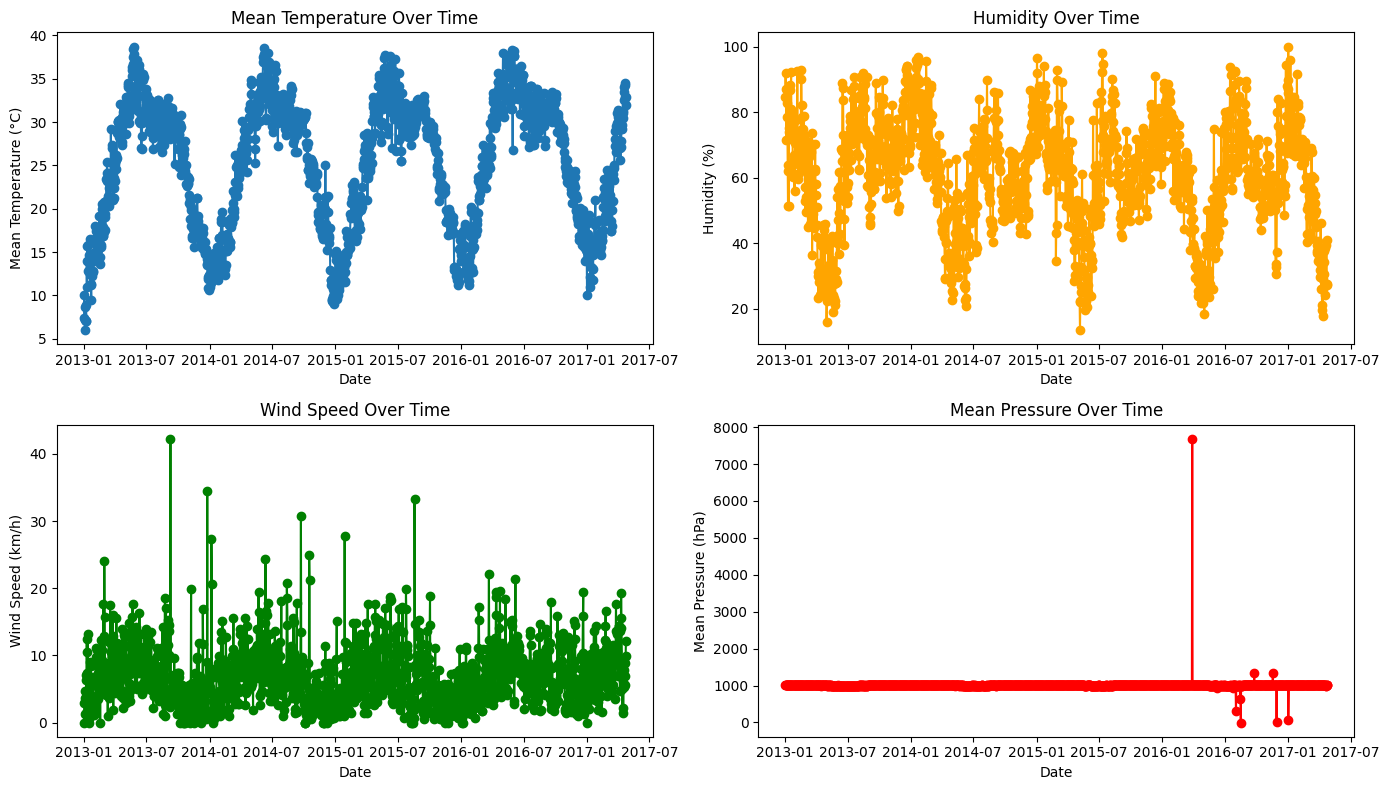

In [17]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(df.index, df['meantemp'], marker='o')
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')

plt.subplot(2, 2, 2)
plt.plot(df.index, df['humidity'], marker='o', color='orange')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')

plt.subplot(2, 2, 3)
plt.plot(df.index, df['wind_speed'], marker='o', color='green')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(2, 2, 4)
plt.plot(df.index, df['meanpressure'], marker='o', color='red')
plt.title('Mean Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Pressure (hPa)')

plt.tight_layout()
plt.show()

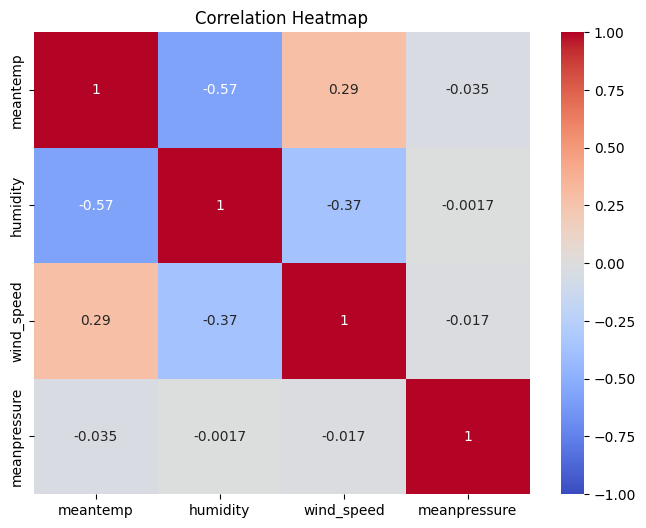

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

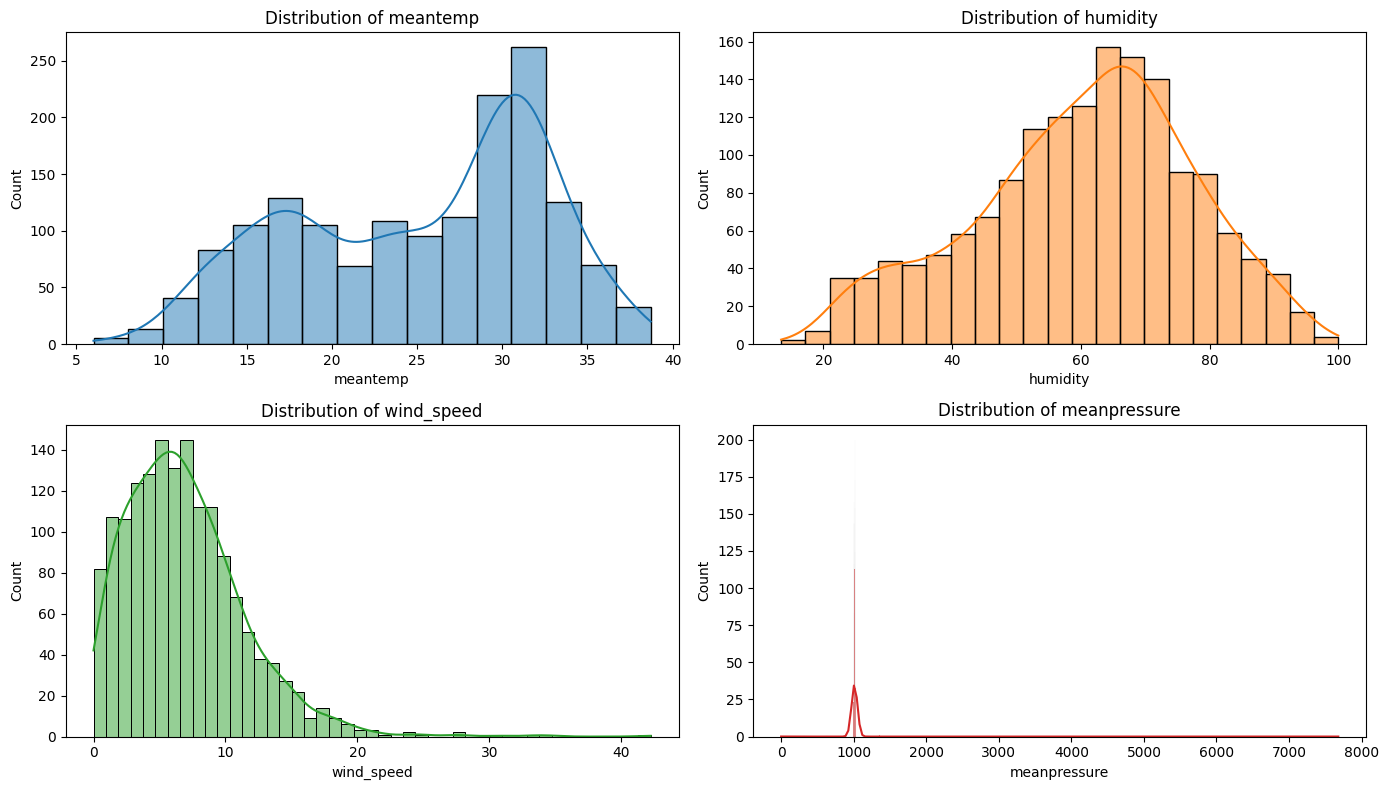

In [19]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], kde=True, color=f'C{i}')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

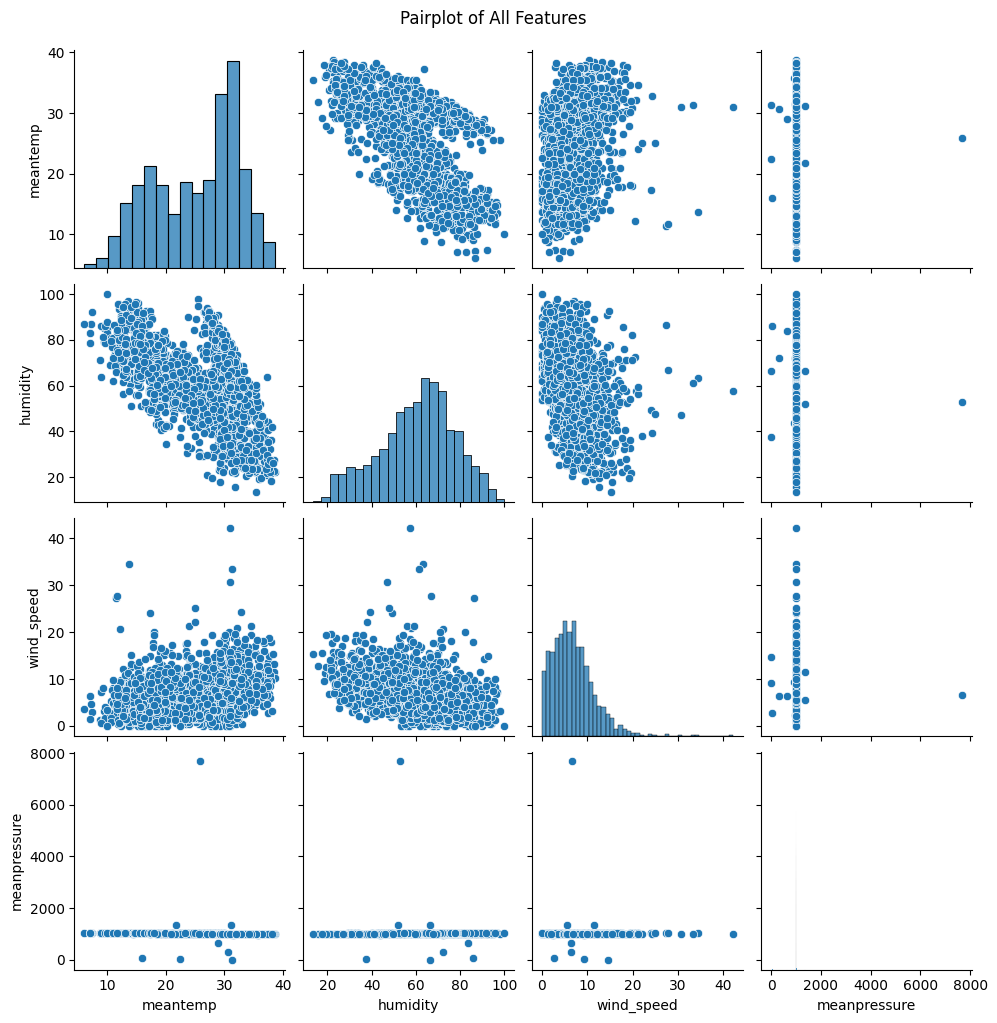

In [20]:
sns.pairplot(df)
plt.suptitle('Pairplot of All Features', y=1.02)
plt.show()

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> TIME SERIES </div>


## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> SINGLE EXPONENTIAL SMOOTHING </div>


### Single Exponential Smoothing

Single Exponential Smoothing (SES) is used for forecasting time series data that has no clear trend or seasonal pattern. The main idea is to apply a weighted average to past observations, giving more weight to recent observations.

**Formula:**

$$
\hat{y}_{t+1} = \alpha y_t + (1 - \alpha)\hat{y}_t
$$

Where:

- \$( \hat{y}_{t+1} \)$ is the forecasted value.

- \$( y_t \)$ is the actual value at time t.

- \$( \alpha \)$ is the smoothing factor, where ($ 0 < \alpha < 1 \$).

**Use Case:** Suitable for data without trend and seasonality.


In [21]:
def ses_optimizer(train, alphas, step=48):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

In [22]:
alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(train, alphas, step=26)

alpha: 0.01 mae: 5.3789
alpha: 0.11 mae: 9.1765
alpha: 0.21 mae: 8.6496
alpha: 0.31 mae: 8.2
alpha: 0.41 mae: 7.8506
alpha: 0.51 mae: 7.5711
alpha: 0.61 mae: 7.3393
alpha: 0.71 mae: 7.1483
alpha: 0.81 mae: 6.9889
alpha: 0.91 mae: 6.8521
best_alpha: 0.01 best_mae: 5.3789


In [23]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred_ses = ses_model.forecast(26)

In [24]:
y_pred_ses[:10]

2016-11-06    24.12991
2016-11-13    24.12991
2016-11-20    24.12991
2016-11-27    24.12991
2016-12-04    24.12991
2016-12-11    24.12991
2016-12-18    24.12991
2016-12-25    24.12991
2017-01-01    24.12991
2017-01-08    24.12991
Freq: W-SUN, dtype: float64

In [25]:
def plot_prediction(y_pred, label):
    train.plot(legend=True, label="TRAIN")
    test.plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train, Test and Predicted Test Using "+label)
    plt.show()

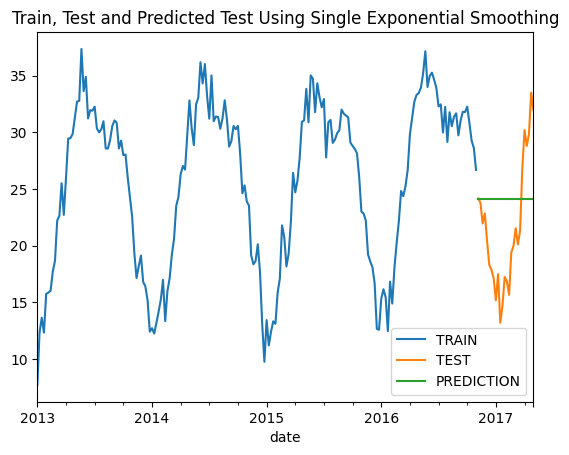

In [26]:
plot_prediction(y_pred_ses, "Single Exponential Smoothing")

**Conclusion:** The flat nature of the predictions indicates that SES cannot capture the seasonal and cyclical variations present in this dataset. For data with such characteristics, more advanced models like Double Exponential Smoothing, Triple Exponential Smoothing (Holt-Winters), or SARIMA would be more appropriate.

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> DOUBLE EXPONENTIAL SMOOTHING </div>


### Double Exponential Smoothing (Holt’s Linear Trend Model)

**Description**: Double Exponential Smoothing, or Holt’s method, is an extension of SES that accounts for trends in the data. It introduces a second smoothing equation for the trend.

**Formulas**:

**Level equation**:

$$
l_t = \alpha y_t + (1 - \alpha)(l_{t-1} + b_{t-1})
$$

**Trend equation**:

$$
b_t = \beta (l_t - l_{t-1}) + (1 - \beta)b_{t-1}
$$

**Forecast equation**:

$$
\hat{y}_{t+h} = l_t + h b_t
$$

Where:

- \$( l_t \)$ is the level of the series at time t.

- \$( b_t \)$ is the trend at time t.

- \$( \alpha \) and \( \beta \)$ are smoothing parameters for the level and trend, respectively.


**Use Case**: Suitable for data with a trend but no seasonality.


In [27]:
def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            #print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae

In [28]:
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

In [29]:
best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, step=26)

best_alpha: 0.11 best_beta: 0.31 best_mae: 6.0667


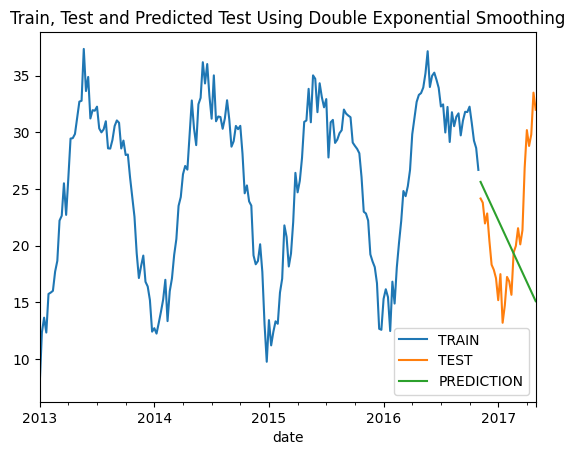

In [30]:
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                         smoothing_slope=best_beta)
y_pred_des = des_model.forecast(26)

plot_prediction(y_pred_des, "Double Exponential Smoothing")

**Conclusion:** Although Double Exponential Smoothing is an improvement over SES due to its ability to model trends, it still falls short when dealing with data that has significant seasonality. The linear nature of the predictions suggests that DES is not equipped to handle the periodic fluctuations inherent in this dataset. For data with both trends and seasonality, more sophisticated models like Triple Exponential Smoothing (Holt-Winters) or SARIMA would be better suited.

This graph emphasizes that while DES provides a step up from SES, it is still limited in capturing complex seasonal patterns, leading to less accurate predictions in such cases.

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> TRIPLE EXPONENTIAL SMOOTHING </div>


### Triple Exponential Smoothing (Holt-Winters)

**Description**: Triple Exponential Smoothing, or the Holt-Winters method, extends double exponential smoothing by adding a component for seasonality. It’s suitable for data with both trends and seasonal patterns.

**Formulas**:

**Level equation**:

$$
l_t = \alpha \left(\frac{y_t}{s_{t-m}}\right) + (1 - \alpha)(l_{t-1} + b_{t-1})
$$

**Trend equation**:

$$
b_t = \beta (l_t - l_{t-1}) + (1 - \beta)b_{t-1}
$$

**Seasonality equation**:

$$
s_t = \gamma \left(\frac{y_t}{l_t}\right) + (1 - \gamma)s_{t-m}
$$

**Forecast equation**:

$$
\hat{y}_{t+h} = (l_t + hb_t) s_{t+h-m(k)}
$$

Where:

- $ l_t $ is the level of the series at time $ t $.
- $ b_t $ is the trend at time $ t $.
- $ s_t $ is the seasonal component at time $ t $.
- $ m $ is the length of the seasonal cycle.
- $ k $ is the integer part of $ \frac{h-1}{m} $.

**Use Case**: Suitable for data with both trends and seasonality.



In [31]:
def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=52).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        #print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

In [32]:
alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step=26)

best_alpha: 0.3 best_beta: 0.9 best_gamma: 0.3 best_mae: 1.4269


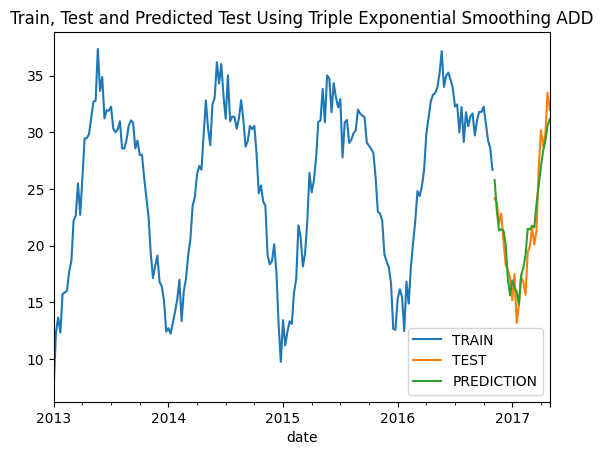

In [33]:
tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=52).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

y_pred_tes = tes_model.forecast(26)

plot_prediction(y_pred_tes, "Triple Exponential Smoothing ADD")

In [34]:
mean_absolute_error(test, y_pred_tes)

1.4269191802410195

**Conclusion:** The Triple Exponential Smoothing model performs significantly better than the previous models, accurately capturing both the trend and the seasonality in the data. The use of an additive seasonal component ensures that the model adapts to the cyclical variations inherent in the dataset. This graph demonstrates that TES (Holt-Winters) is well-suited for data with both trend and seasonal components.

Overall, this model provides robust forecasts, making it an ideal choice for scenarios where seasonality plays a key role.

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> ARIMA (AUTOREGRESSIVE INTEGRATED MOVING AVERAGE) </div>


### ARIMA (Autoregressive Integrated Moving Average)

**Description**: ARIMA models are powerful for time series forecasting, particularly for non-seasonal data. It combines three components: autoregression (AR), differencing (I), and moving average (MA).

**Formulas**:

**AR component**:

$$
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t
$$

**I (Differencing) component**:

$$
y_t' = y_t - y_{t-1}
$$

**MA component**:

$$
y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}
$$

Where:

- $ \phi $ represents autoregressive coefficients.
- $ \theta $ represents moving average coefficients.
- $ \epsilon_t $ is the error term.

**Use Case**: Best for data with a trend and cycles but no clear seasonality.


In [35]:
def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arma_model_result = ARIMA(train, order=order).fit(disp=0)
            aic = arma_model_result.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except:
            continue
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params

In [36]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
best_params_aic = arima_optimizer_aic(train, pdq)

Best ARIMANone AIC=inf


In [37]:
arima_model = ARIMA(train, best_params_aic).fit()
y_pred_arima = arima_model.forecast(steps=26)
mean_absolute_error(test, y_pred_arima)

6.233715493789049

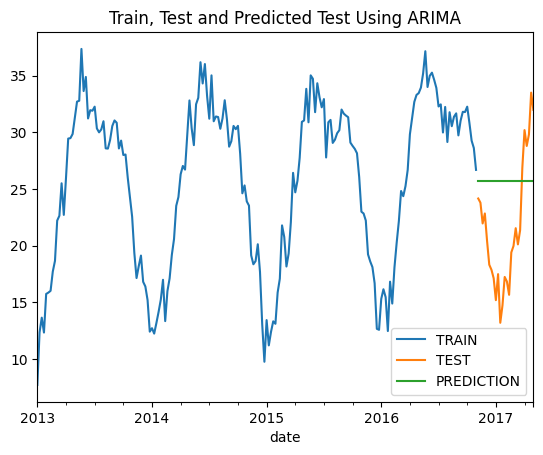

In [38]:
plot_prediction(pd.Series(y_pred_arima, index=test.index), "ARIMA")

**Conclusion:** The flat prediction line indicates that the ARIMA model could not capture the seasonal fluctuations present in the dataset. This limitation arises because the ARIMA model is best suited for data with trends and cycles but without pronounced seasonality. For datasets like this one, where strong seasonal patterns are dominant, models like SARIMA (Seasonal ARIMA) or Triple Exponential Smoothing (Holt-Winters) are better choices.

This graph clearly highlights that while ARIMA models are powerful for certain types of time series data, they are not ideal when dealing with data that has prominent seasonal components.

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> SARIMA (SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE) </div>


### SARIMA (Seasonal ARIMA)

**Description**: SARIMA extends ARIMA by including seasonal components. It’s suitable for time series data with both seasonal and non-seasonal components.

**Formulas**:

**Seasonal AR component**:

$$
y_t = \phi_1 y_{t-s} + \phi_2 y_{t-2s} + \dots + \phi_P y_{t-Ps}
$$

**Seasonal Differencing**:

$$
y_t' = y_t - y_{t-s}
$$

**Seasonal MA component**:

$$
y_t = \epsilon_t + \theta_1 \epsilon_{t-s} + \theta_2 \epsilon_{t-2s} + \dots + \theta_Q \epsilon_{t-Qs}
$$

Where:

- $ s $ is the number of periods in a seasonal cycle (e.g., 12 for monthly data with yearly seasonality).
- $ P, D, Q $ are the seasonal orders for AR, differencing, and MA components.

**Use Case**: Ideal for data with clear seasonal patterns along with trends.


In [39]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [40]:
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), float("inf"), None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('SARIMA{}x{} - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

In [41]:
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:1883.781252308489
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC:1731.5253382273818
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:688.6763061921374
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:666.7183531633932
SARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:1179.831885846681
SARIMA(0, 0, 0)x(1, 0, 1, 52) - AIC:1156.8132759207094
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:670.7223709763482
SARIMA(0, 0, 0)x(1, 1, 1, 52) - AIC:668.6977212505617
SARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:1633.0195259381505
SARIMA(0, 0, 1)x(0, 0, 1, 52) - AIC:1499.218334230381
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:669.9027990129664
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC:641.4544796998891
SARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:1123.6690015812019
SARIMA(0, 0, 1)x(1, 0, 1, 52) - AIC:1092.1775787603756
SARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:646.6776218091359
SARIMA(0, 0, 1)x(1, 1, 1, 52) - AIC:643.4318757910378
SARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC:855.9311520023889
SARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC:852.8988021785515
SARIMA(0, 1, 0)x(0, 1, 

In [42]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_sar = sarima_final_model.get_forecast(steps=26)

In [43]:
y_pred_sarima = y_pred_sar.predicted_mean
mean_absolute_error(test, y_pred_sarima)

1.6940564149532589

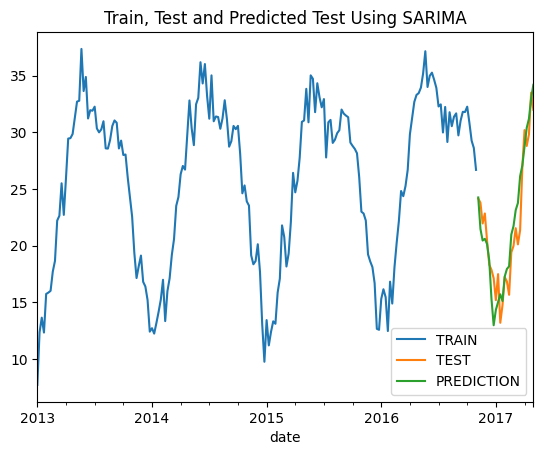

In [44]:
plot_prediction(pd.Series(y_pred_sarima, index=test.index), "SARIMA")

**Conclusion:** The SARIMA model performs exceptionally well for this dataset, accurately capturing both trend and seasonality. The prediction line aligns closely with the actual test data, demonstrating the model’s strength in forecasting time series with clear seasonal cycles.

This graph confirms that for data with both seasonal and trend components, SARIMA is a highly effective model. Its flexibility in handling seasonality makes it a preferred choice for forecasting tasks where cycles and periodic patterns play a critical role in the data.

In [45]:
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), float("inf"), None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=26)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{} - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{} - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order


In [46]:
best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 52) - MAE:21.556108010879633
SARIMA(0, 0, 0)x(0, 0, 1, 52) - MAE:11.829875103013826
SARIMA(0, 0, 0)x(0, 1, 0, 52) - MAE:2.1681164037157052
SARIMA(0, 0, 0)x(0, 1, 1, 52) - MAE:1.9645172747684219
SARIMA(0, 0, 0)x(1, 0, 0, 52) - MAE:2.1729863698149487
SARIMA(0, 0, 0)x(1, 0, 1, 52) - MAE:1.9723993756962923
SARIMA(0, 0, 0)x(1, 1, 0, 52) - MAE:1.9464873931183702
SARIMA(0, 0, 0)x(1, 1, 1, 52) - MAE:1.978971560135349
SARIMA(0, 0, 1)x(0, 0, 0, 52) - MAE:21.025055146611273
SARIMA(0, 0, 1)x(0, 0, 1, 52) - MAE:11.497378724677255
SARIMA(0, 0, 1)x(0, 1, 0, 52) - MAE:2.1296920551635212
SARIMA(0, 0, 1)x(0, 1, 1, 52) - MAE:2.041231664488165
SARIMA(0, 0, 1)x(1, 0, 0, 52) - MAE:2.1281835192425955
SARIMA(0, 0, 1)x(1, 0, 1, 52) - MAE:1.9825718722455323
SARIMA(0, 0, 1)x(1, 1, 0, 52) - MAE:1.9064537652350375
SARIMA(0, 0, 1)x(1, 1, 1, 52) - MAE:2.0588623558615016
SARIMA(0, 1, 0)x(0, 0, 0, 52) - MAE:6.754999766250598
SARIMA(0, 1, 0)x(0, 0, 1, 52) - MAE:6.031992092025183
SARIMA(0, 1, 0

In [47]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_sar = sarima_final_model.get_forecast(steps=26)
y_pred_sarima = y_pred_sar.predicted_mean
mean_absolute_error(test, y_pred_sarima)

1.4875936995519685

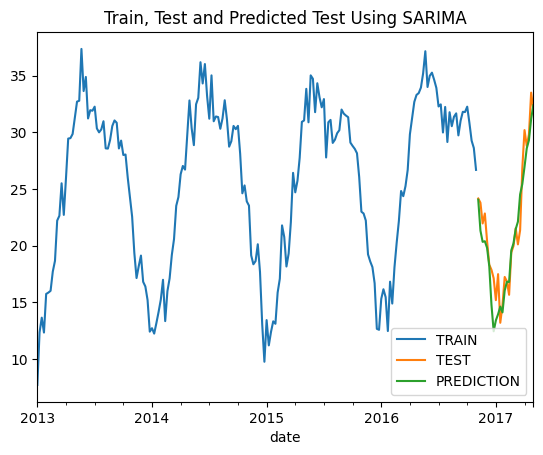

In [48]:
plot_prediction(pd.Series(y_pred_sarima, index=test.index), "SARIMA")

**Conclusion:** This graph confirms that the SARIMA model is highly effective for this dataset, which contains both trend and seasonality. Compared to simpler models, SARIMA's ability to incorporate seasonality directly into its framework makes it the best performer in this analysis. The tight alignment of the prediction line with the actual data underscores SARIMA’s suitability for forecasting when both seasonal cycles and trends are present.

Overall, this graph reinforces that SARIMA is a powerful tool for time series forecasting, especially in scenarios where data shows clear periodic patterns along with long-term trends.

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> FINAL MODELS </div>


### <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> TES </div>


In [49]:
tes_model_final = ExponentialSmoothing(df["meantemp"], trend="add", seasonal="add", seasonal_periods=52).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

In [50]:
y_pred = tes_model_final.forecast(6)
y_pred

1576    32.827861
1577    34.610896
1578    35.060480
1579    35.141427
1580    34.045042
1581    31.577228
dtype: float64

### <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> SARIMA </div>


In [51]:
sarima_model_final = SARIMAX(df["meantemp"], order=best_order, seasonal_order=best_seasonal_order).fit(disp=0)

In [52]:
y_pred_sarima = sarima_model_final.get_forecast(steps=6)
y_pred = y_pred_sarima.predicted_mean

In [53]:
y_pred

1576    31.859875
1577    31.785515
1578    31.233129
1579    31.006614
1580    31.276756
1581    30.818101
Name: predicted_mean, dtype: float64

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> LSTM </div>

In [54]:
weekly_mean

date
2013-01-06     7.705556
2013-01-13    12.343537
2013-01-20    13.642857
2013-01-27    12.329592
2013-02-03    15.736905
                ...    
2017-04-02    30.203515
2017-04-09    28.805189
2017-04-16    29.820862
2017-04-23    33.511508
2017-04-30    32.000000
Freq: W-SUN, Name: meantemp, Length: 226, dtype: float64

In [55]:
data = weekly_mean.values.reshape(-1, 1)

In [56]:
def create_sequences(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_sequences(data, time_step)

# Split the data into train and test sets before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [57]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

In [58]:
model = Sequential()

model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(time_step, 1))))
model.add(Dropout(0.2))  
model.add(LayerNormalization())

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LayerNormalization())

model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(LayerNormalization())

model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='AdamW', loss='mean_squared_error')

In [60]:
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.5510
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0898
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0822
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0712
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0667
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0659
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0508
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0302
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0397
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0272
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0220
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0196
Epoch 13/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0206
Epoch 14/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0222
Epoch 15/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0159
Epo

In [61]:
y_test_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


In [62]:
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test)

In [63]:
test_indices = weekly_mean.index[-len(y_test):]

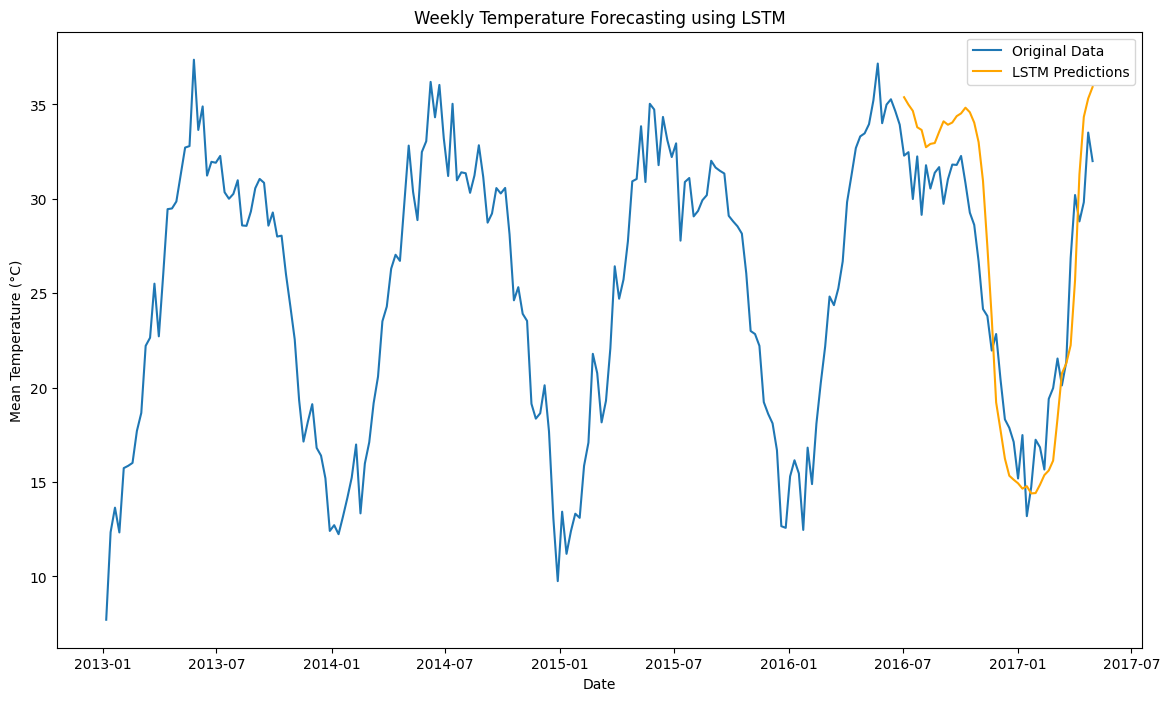

In [64]:
plt.figure(figsize=(14, 8))
plt.plot(weekly_mean.index, weekly_mean, label='Original Data')
plt.plot(test_indices, y_test_pred, label='LSTM Predictions', color='orange')
plt.title('Weekly Temperature Forecasting using LSTM')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()


**Conclusion:**

The LSTM model successfully captures the overall trend of the weekly mean temperature data but with some discrepancies. The predictions follow the general shape of the original data, especially capturing the seasonal patterns and the upward/downward trends.

**Observations:**

* Pattern Recognition: The model is able to detect the recurring seasonal cycles present in the data, which is a positive sign. The peaks and troughs of the temperature trends are reasonably mirrored in the predictions.

* Overfitting in Some Areas: In some sections, particularly near the test data's beginning and end, the predictions show sharper movements or deviations, indicating possible overfitting. This behavior suggests that the model is trying to fit too closely to the training data, which is common when training epochs are high or when the model complexity is substantial.

* Temporal Shift: There is a slight misalignment in certain portions, indicating that the model might struggle with accurately predicting the exact timing of changes, particularly near transition points between seasons.

**Potential Improvements:**

* Increase Sequence Length: To improve the model’s understanding of long-term dependencies, increasing the time step (sequence length) might help.

* Regularization and Dropout: Fine-tuning the dropout layers or incorporating regularization could mitigate overfitting, resulting in smoother predictions.

* Model Complexity: Exploring additional layers or more sophisticated architectures (e.g., stacked LSTMs) might yield better results.

* Hybrid Models: Combining LSTM with other models, such as ARIMA for capturing trend components, might enhance prediction accuracy.

Overall, while the LSTM model captures the general seasonal trends well, further fine-tuning and adjustments could lead to even better alignment with the actual data, reducing the prediction errors and increasing temporal accuracy.

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #145; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#995"> Conclusion and Final Thoughts </div>

In this notebook, we explored a variety of time series forecasting techniques, from Single Exponential Smoothing to more advanced models like SARIMA and Triple Exponential Smoothing. Each model was carefully optimized, and we compared their performance based on the Mean Absolute Error (MAE) metric.

The insights gained highlight that no single model fits all time series data. For data without clear seasonality or trends, simple models like Single Exponential Smoothing can be effective. However, for more complex patterns involving both trend and seasonality, models like SARIMA and Holt-Winters (Triple Exponential Smoothing) provide better predictions.

The goal of this notebook was to demonstrate not only how these models work but also the process of tuning and evaluating them. Whether you are dealing with basic or complex time series data, understanding these techniques will help you make informed decisions when forecasting.


I hope this notebook was informative and useful. Feel free to reach out with any questions, suggestions, or feedback. Keep experimenting and happy forecasting!

<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://media1.tenor.com/m/d0DJMIYgDqoAAAAC/claudio-keanu.gif" alt="Time Series Forecasting" width="500">
</div>